In [1]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

In [2]:
df = pd.read_csv("./Cleaned_dataset.csv")
df.drop_duplicates(keep='last', ignore_index=True, inplace=True)
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955



        Duration_in_hours      Days_left           Fare
count      445366.000000  445366.000000  445366.000000
mean           12.182491      25.617822   22919.747165
std             7.299361      14.302610   20394.214040
min             0.750000       1.000000    1307.000000
25%             6.500000      13.000000    8712.000000
50%            11.250000      26.000000   13362.000000
75%            16.333300      38.000000   36980.000000
max            43.583300      50.000000  143019.000000 



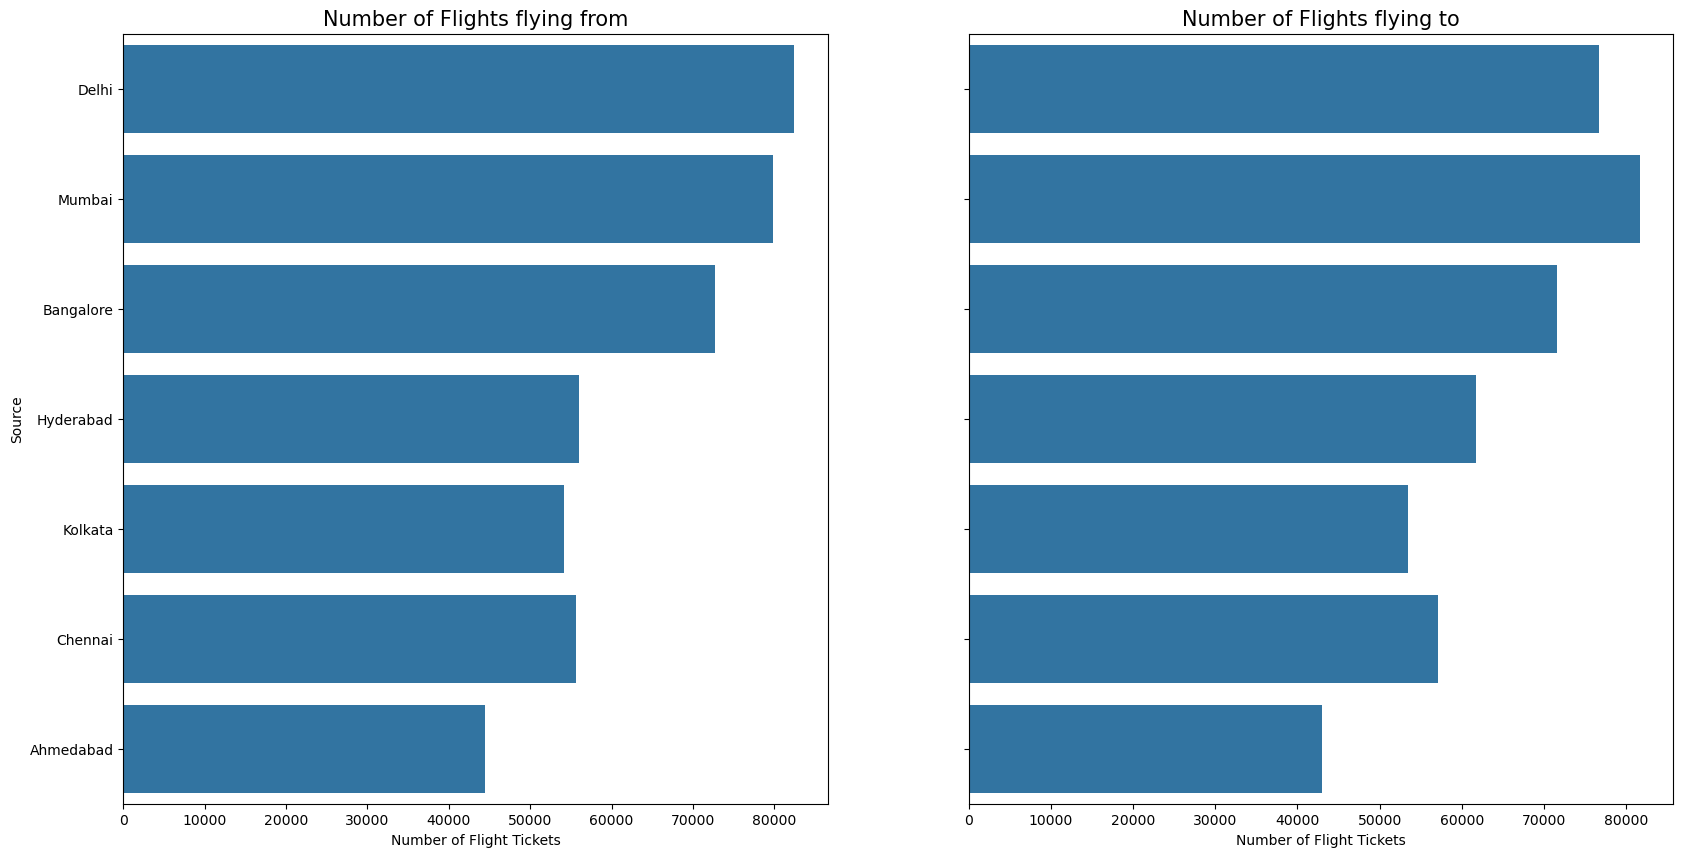

In [3]:

fig,axs = plt.subplots(1,2, figsize=(20,10),sharey=True)
sns.countplot(data=df,y="Source",ax=axs[0])
sns.countplot(data=df,y="Destination",ax=axs[1])
for ax in axs:
    ax.set_xlabel('Number of Flight Tickets')
axs[0].set_title("Number of Flights flying from",size=15)
axs[1].set_title("Number of Flights flying to",size=15)
print('\n',df.describe(), '\n')
plt.show()

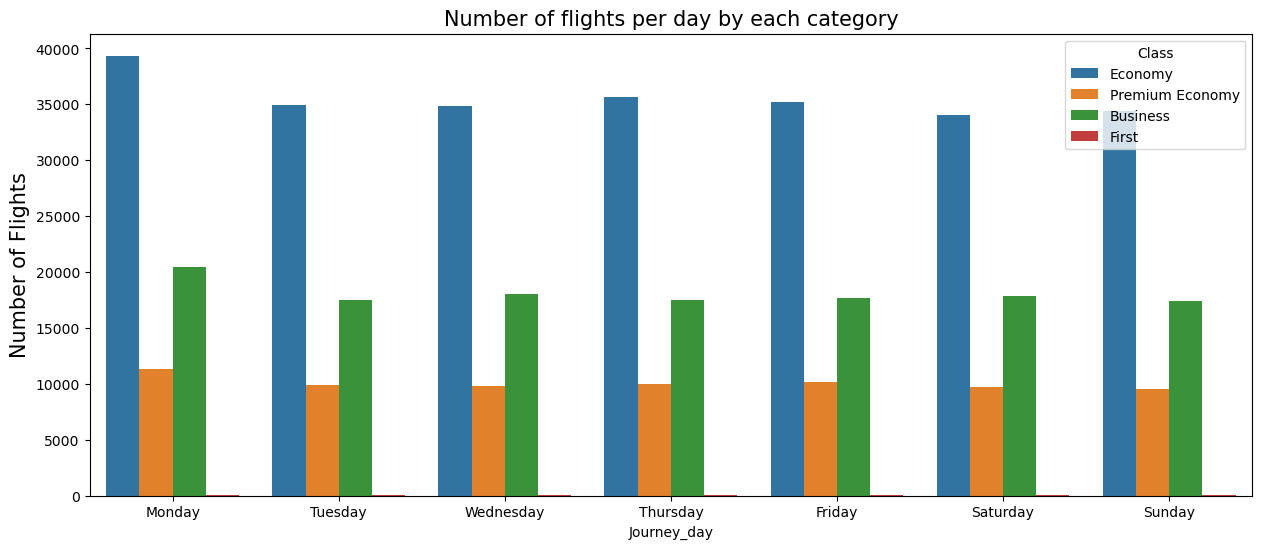

In [4]:
plt.figure(figsize=(15,6))
sns.countplot(x=df.Journey_day,hue=df.Class)
plt.ylabel("Number of Flights",size=15)
plt.title("Number of flights per day by each category",size=15)
plt.show()


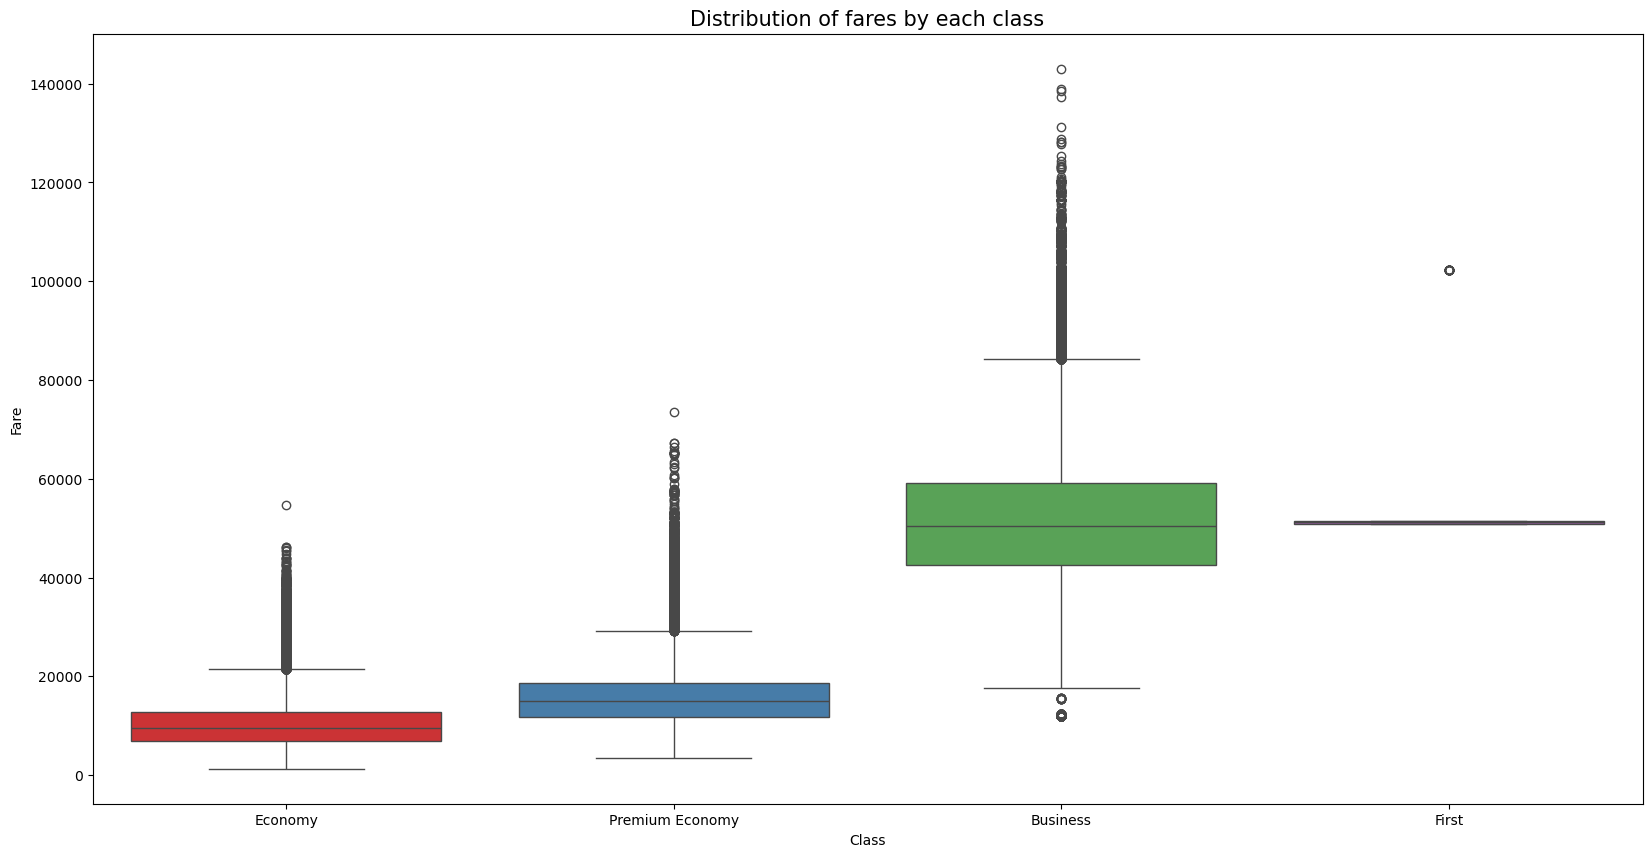

In [5]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Class, y=df.Fare, hue=df.Class, palette='Set1')
plt.title("Distribution of fares by each class",size=15)
plt.show()


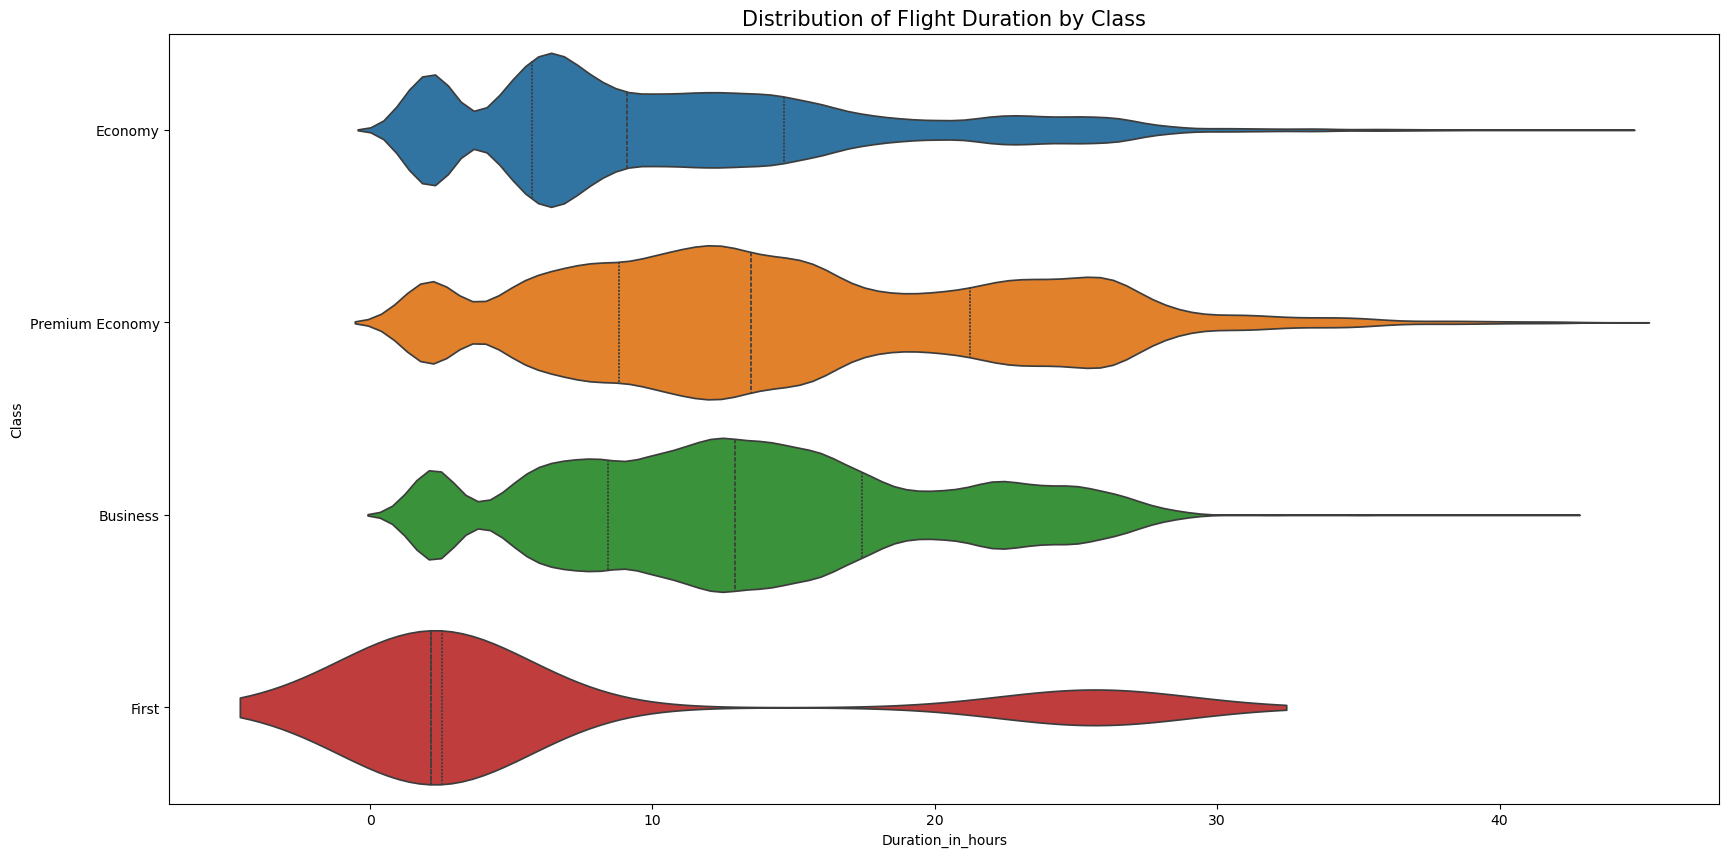

In [6]:
plt.figure(figsize=(20,10))
sns.violinplot(data=df, y="Class", x="Duration_in_hours",inner="quartile", hue=df.Class)
plt.title("Distribution of Flight Duration by Class",size=15)
plt.show()


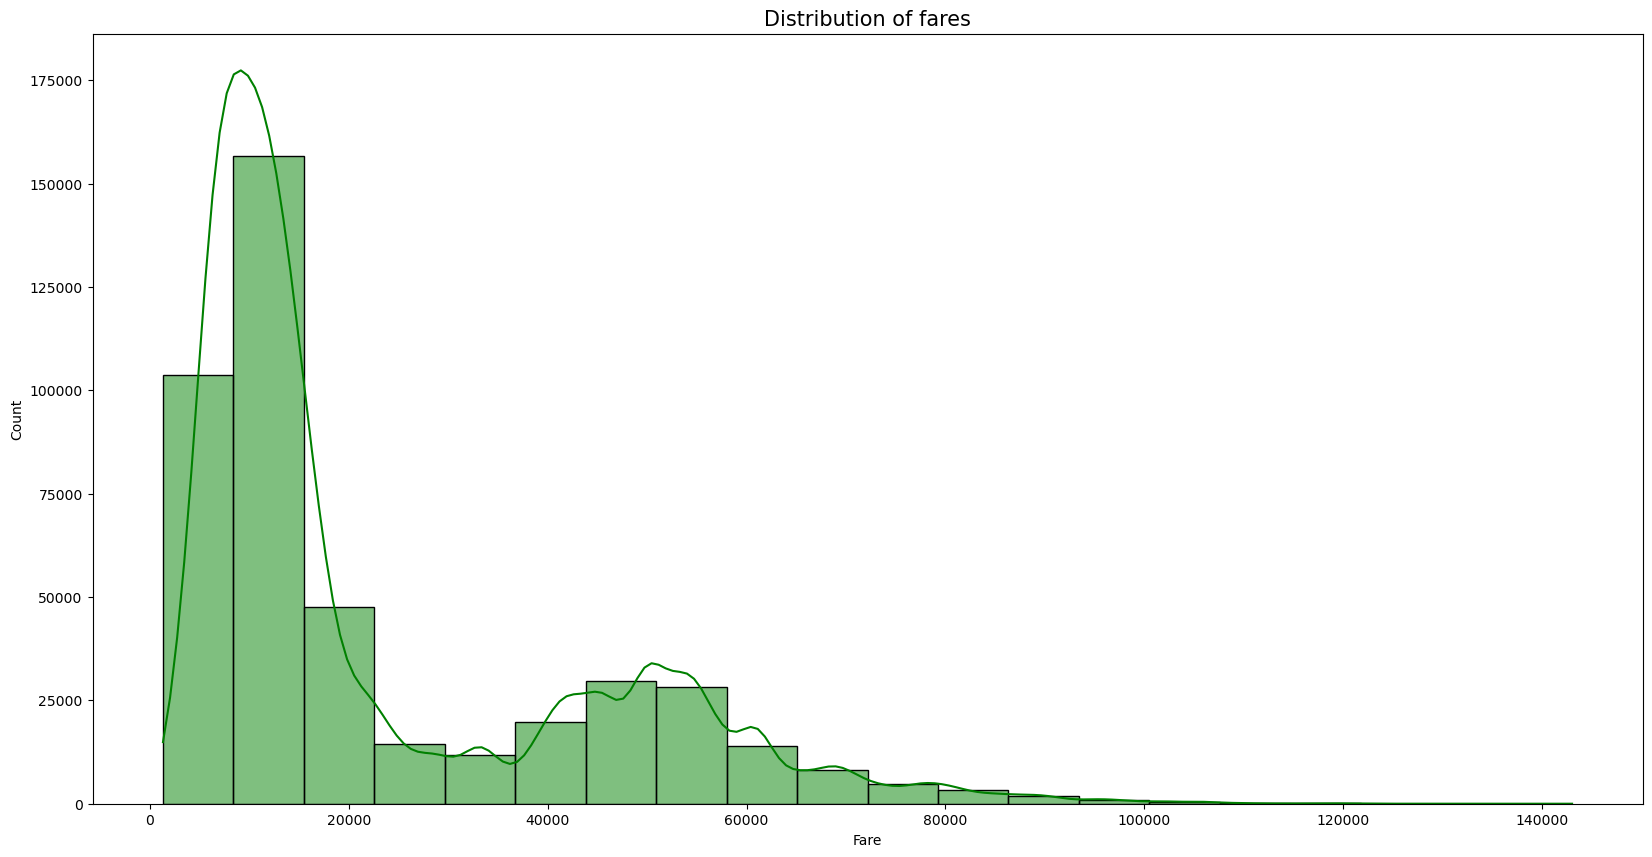

In [7]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare,kde=True,bins=20, color='green')
plt.title("Distribution of fares",size=15)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder # type: ignore
from sklearn.preprocessing import OneHotEncoder # type: ignore

In [9]:
df1 = df.copy(deep=True) # create a deep copy for onehot encoding

In [10]:
for col in df.columns:
    print(col, ': ', len(df[col].unique()), ' labels')

Date_of_journey :  50  labels
Journey_day :  7  labels
Airline :  9  labels
Flight_code :  1405  labels
Class :  4  labels
Source :  7  labels
Departure :  4  labels
Total_stops :  3  labels
Arrival :  4  labels
Destination :  7  labels
Duration_in_hours :  482  labels
Days_left :  50  labels
Fare :  20781  labels


In [11]:
encode = LabelEncoder()
df.Class = encode.fit_transform(df.Class)
df.Journey_day = encode.fit_transform(df.Journey_day)
df.Airline = encode.fit_transform(df.Airline)
df['Flight_code'] = encode.fit_transform(df["Flight_code"])
df.Source = encode.fit_transform(df.Source)
df.Total_stops = encode.fit_transform(df.Total_stops)
df.Destination = encode.fit_transform(df.Destination)
df.Arrival = encode.fit_transform(df.Arrival)
df.Departure = encode.fit_transform(df.Departure)
df.head(20)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,1,6,1209,1,3,2,2,2,6,2.0833,1,5335
1,2023-01-16,1,5,164,1,3,2,2,3,6,2.3333,1,5899
2,2023-01-16,1,4,942,1,3,2,2,3,6,2.1667,1,5801
3,2023-01-16,1,6,1224,1,3,2,2,2,6,2.0833,1,5794
4,2023-01-16,1,0,852,1,3,2,2,2,6,2.1667,1,5955
5,2023-01-16,1,0,786,1,3,2,2,2,6,2.2500,1,5955
6,2023-01-16,1,0,859,1,3,2,2,3,6,2.2500,1,5955
7,2023-01-16,1,4,930,1,3,2,2,2,6,2.2500,1,5899
8,2023-01-16,1,6,1174,1,3,2,0,1,6,14.3333,1,5829
9,2023-01-16,1,4,938,1,3,2,2,2,6,2.0833,1,5899


In [12]:
pd.get_dummies(df1,  drop_first=True).shape  # nope, too many columns

(445366, 1493)

In [13]:
ohencode = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohetransform = ohencode.fit_transform(df1[["Class"]])

In [14]:
ohetransform

,Class_Business,Class_Economy,Class_First,Class_Premium Economy
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
445361,1.0,0.0,0.0,0.0
445362,1.0,0.0,0.0,0.0
445363,1.0,0.0,0.0,0.0
445364,1.0,0.0,0.0,0.0


In [15]:
df1 = pd.concat([df1, ohetransform], axis=1).drop(columns=['Class'])

In [16]:
df1.head(10)

,Date_of_journey,Journey_day,Airline,Flight_code,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Class_Business,Class_Economy,Class_First,Class_Premium Economy
0,2023-01-16,Monday,SpiceJet,SG-8169,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,0.0,1.0,0.0,0.0
1,2023-01-16,Monday,Indigo,6E-2519,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,0.0,1.0,0.0,0.0
2,2023-01-16,Monday,GO FIRST,G8-354,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,0.0,1.0,0.0,0.0
3,2023-01-16,Monday,SpiceJet,SG-8709,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,0.0,1.0,0.0,0.0
4,2023-01-16,Monday,Air India,AI-805,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,0.0,1.0,0.0,0.0
5,2023-01-16,Monday,Air India,AI-605,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.2500,1,5955,0.0,1.0,0.0,0.0
6,2023-01-16,Monday,Air India,AI-814,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.2500,1,5955,0.0,1.0,0.0,0.0
7,2023-01-16,Monday,GO FIRST,G8-330,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.2500,1,5899,0.0,1.0,0.0,0.0
8,2023-01-16,Monday,SpiceJet,SG-2976,Delhi,After 6 PM,1-stop,6 AM - 12 PM,Mumbai,14.3333,1,5829,0.0,1.0,0.0,0.0
9,2023-01-16,Monday,GO FIRST,G8-346,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5899,0.0,1.0,0.0,0.0


In [17]:
# One Hot encoding the rest of the categorical data
for col in ["Journey_day", "Airline", "Source", "Departure", "Total_stops", "Arrival", "Destination"]:
    ohetransform = ohencode.fit_transform(df1[[col]])
    df1 = pd.concat([df1, ohetransform], axis=1).drop(columns=[col])

# Label Encoding Flight_code
df1.Flight_code = encode.fit_transform(df1.Flight_code)

In [18]:
df1.head()

,Date_of_journey,Flight_code,Duration_in_hours,Days_left,Fare,Class_Business,Class_Economy,Class_First,Class_Premium Economy,Journey_day_Friday,...,Arrival_6 AM - 12 PM,Arrival_After 6 PM,Arrival_Before 6 AM,Destination_Ahmedabad,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,2023-01-16,1209,2.0833,1,5335,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2023-01-16,164,2.3333,1,5899,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2023-01-16,942,2.1667,1,5801,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2023-01-16,1224,2.0833,1,5794,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2023-01-16,852,2.1667,1,5955,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

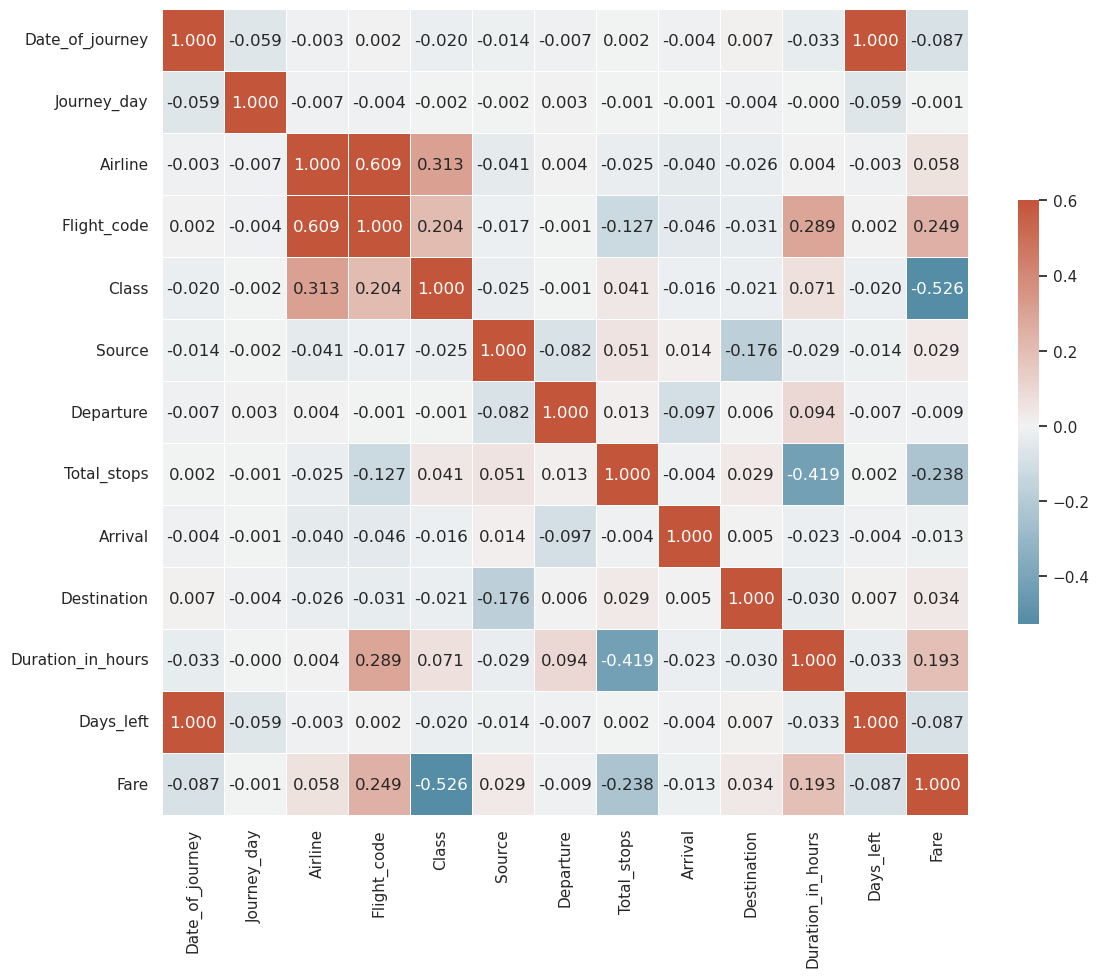

In [19]:
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
corr_matrix = df.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,annot=True,cmap=cmap,fmt='.3f', vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

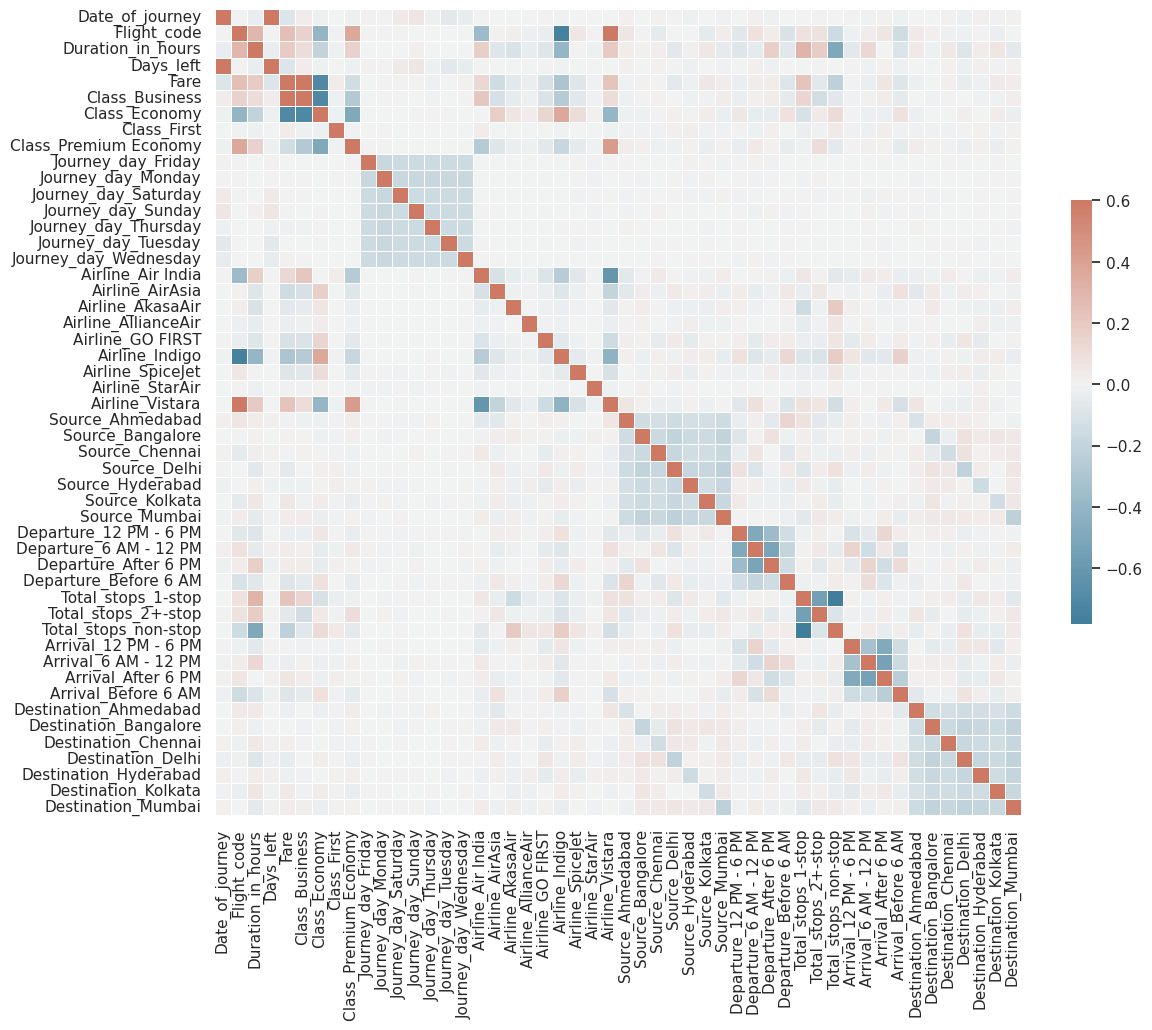

In [20]:
df1['Date_of_journey'] = pd.to_datetime(df1['Date_of_journey'])
corr_matrix = df1.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,cmap=cmap,fmt='.3f', vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
df1.columns

Index(['Date_of_journey', 'Flight_code', 'Duration_in_hours', 'Days_left',
       'Fare', 'Class_Business', 'Class_Economy', 'Class_First',
       'Class_Premium Economy', 'Journey_day_Friday', 'Journey_day_Monday',
       'Journey_day_Saturday', 'Journey_day_Sunday', 'Journey_day_Thursday',
       'Journey_day_Tuesday', 'Journey_day_Wednesday', 'Airline_Air India',
       'Airline_AirAsia', 'Airline_AkasaAir', 'Airline_AllianceAir',
       'Airline_GO FIRST', 'Airline_Indigo', 'Airline_SpiceJet',
       'Airline_StarAir', 'Airline_Vistara', 'Source_Ahmedabad',
       'Source_Bangalore', 'Source_Chennai', 'Source_Delhi',
       'Source_Hyderabad', 'Source_Kolkata', 'Source_Mumbai',
       'Departure_12 PM - 6 PM', 'Departure_6 AM - 12 PM',
       'Departure_After 6 PM', 'Departure_Before 6 AM', 'Total_stops_1-stop',
       'Total_stops_2+-stop', 'Total_stops_non-stop', 'Arrival_12 PM - 6 PM',
       'Arrival_6 AM - 12 PM', 'Arrival_After 6 PM', 'Arrival_Before 6 AM',
       'Destinatio

<Axes: >

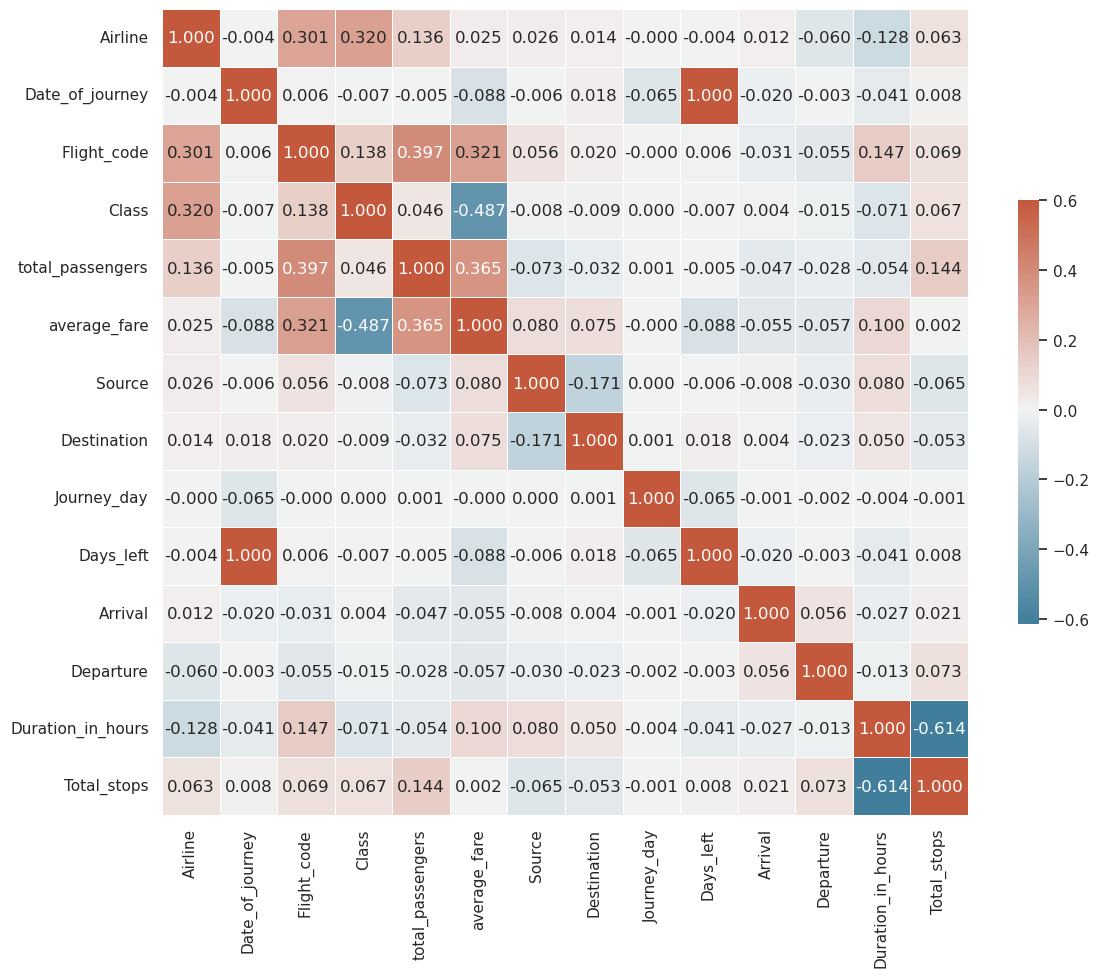

In [21]:
aggregated_df = df.groupby(['Airline', 'Date_of_journey', 'Flight_code', 'Class']).agg(
    total_passengers=('Fare', 'size'),
    average_fare=('Fare', 'mean'),
    Source=('Source', 'first'),
    Destination=('Destination', 'first'),
    Journey_day=('Journey_day', 'first'),
    Days_left=('Days_left', 'mean'),
    Arrival=('Arrival', 'first'),
    Departure=('Departure', 'first'),
    Duration_in_hours=('Duration_in_hours', 'first'),
    Total_stops=('Total_stops', 'first')
).reset_index()

# Rename columns if necessary
aggregated_df.rename(columns={'Fare': 'average_fare'}, inplace=True)

corr_matrix = aggregated_df.corr()

f, ax = plt.subplots(figsize=(13, 11))

sns.heatmap(corr_matrix,annot=True,cmap=cmap,fmt='.3f', vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

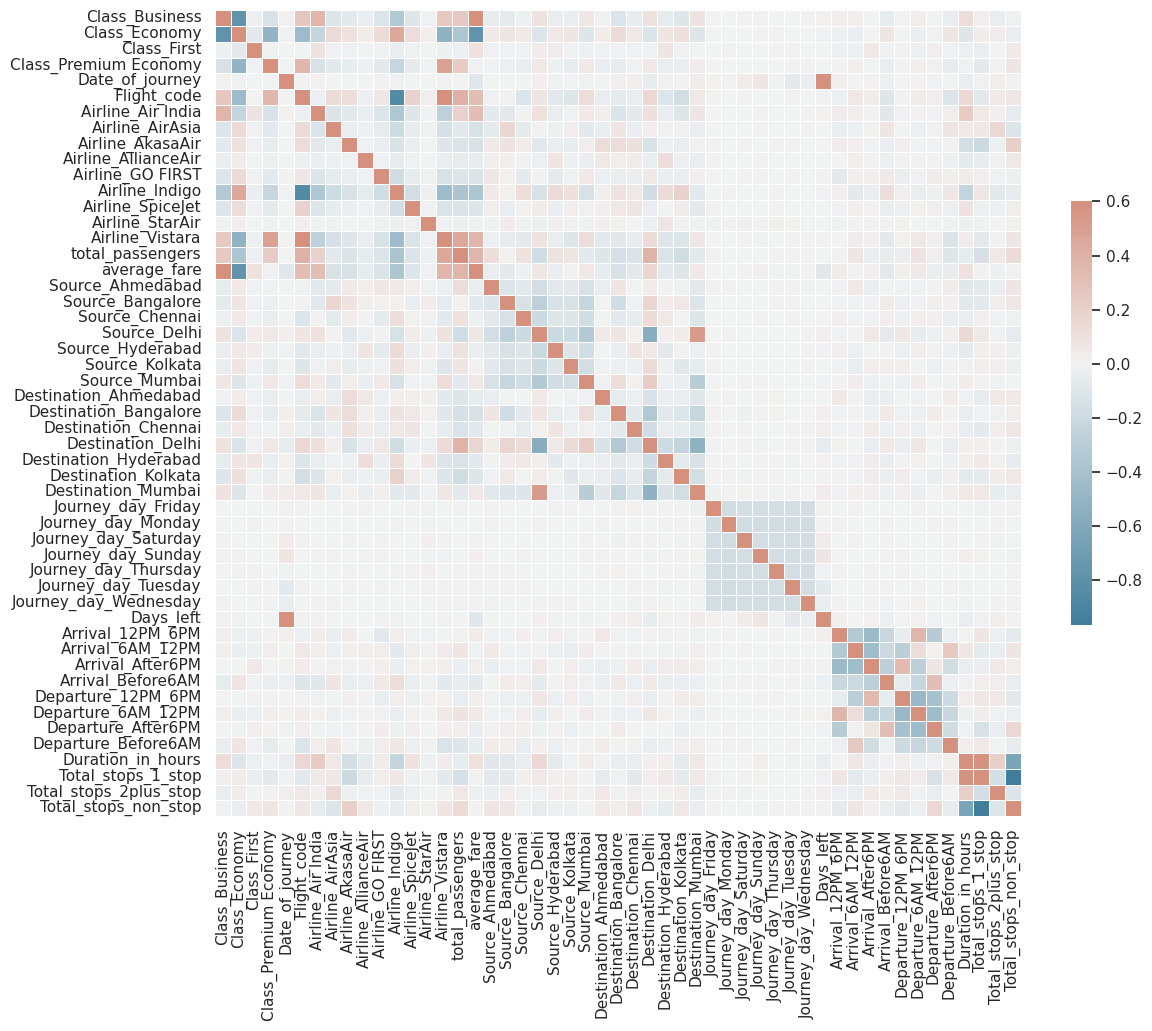

In [31]:
aggregated_df1 = df1.groupby(['Class_Business', 'Class_Economy', 'Class_First',
       'Class_Premium Economy','Date_of_journey', 'Flight_code', 'Airline_Air India',
       'Airline_AirAsia', 'Airline_AkasaAir', 'Airline_AllianceAir',
       'Airline_GO FIRST', 'Airline_Indigo', 'Airline_SpiceJet',
       'Airline_StarAir', 'Airline_Vistara',
       ]).agg(
    total_passengers=('Fare', 'size'),
    average_fare=('Fare', 'mean'),
    
    Source_Ahmedabad=('Source_Ahmedabad', 'first'),
    Source_Bangalore=('Source_Bangalore', 'first'), 
    Source_Chennai=('Source_Chennai', 'first'),
    Source_Delhi=('Source_Delhi', 'first'),
    Source_Hyderabad=('Source_Hyderabad', 'first'), 
    Source_Kolkata=('Source_Kolkata', 'first'), 
    Source_Mumbai=('Source_Mumbai', 'first'),
    Destination_Ahmedabad=('Destination_Ahmedabad', 'first'), 
    Destination_Bangalore=('Destination_Bangalore', 'first'), 
    Destination_Chennai=('Destination_Chennai', 'first'),
    Destination_Delhi=('Destination_Delhi', 'first'), 
    Destination_Hyderabad=('Destination_Hyderabad', 'first'),
    Destination_Kolkata=('Destination_Kolkata', 'first'),
    Destination_Mumbai=('Destination_Mumbai', 'first'),
    Journey_day_Friday=('Journey_day_Friday', 'first'), 
    Journey_day_Monday=('Journey_day_Monday', 'first'),
    Journey_day_Saturday=('Journey_day_Saturday', 'first'), 
    Journey_day_Sunday=('Journey_day_Sunday', 'first'), 
    Journey_day_Thursday=('Journey_day_Thursday', 'first'),
    Journey_day_Tuesday=('Journey_day_Tuesday', 'first'),
    Journey_day_Wednesday=('Journey_day_Wednesday', 'first'),
    Days_left=('Days_left', 'mean'),
    Arrival_12PM_6PM=('Arrival_12 PM - 6 PM', 'first'),
    Arrival_6AM_12PM=('Arrival_6 AM - 12 PM', 'first'), 
    Arrival_After6PM=('Arrival_After 6 PM', 'first'), 
    Arrival_Before6AM=('Arrival_Before 6 AM', 'first'),
    Departure_12PM_6PM=('Departure_12 PM - 6 PM', 'first'), 
    Departure_6AM_12PM=('Departure_6 AM - 12 PM', 'first'),
    Departure_After6PM=('Departure_After 6 PM', 'first'),
    Departure_Before6AM=('Departure_Before 6 AM', 'first'),
    Duration_in_hours=('Duration_in_hours', 'first'),
    Total_stops_1_stop=('Total_stops_1-stop','first'),
    Total_stops_2plus_stop=('Total_stops_2+-stop','first'), 
    Total_stops_non_stop=('Total_stops_non-stop', 'first')
).reset_index()

# Rename columns if necessary
aggregated_df1.rename(columns={'Fare': 'average_fare'}, inplace=True)

corr_matrix = aggregated_df1.corr()

f, ax = plt.subplots(figsize=(13, 11))

sns.heatmap(corr_matrix,cmap=cmap,fmt='.3f', vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})